In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
dane = pd.read_csv('movies.csv')
dane = dane[['name', 'rating', 'genre', 'year', 'score', 'votes', 'country', 'budget', 'gross', 'company', 'runtime']]
dane.head()

,name,rating,genre,year,score,votes,country,budget,gross,company,runtime
7663,More to Life,NaN,Drama,2020,3.1,18.0,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,4.7,36.0,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,5.7,29.0,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,NaN,NaN,United States,15000.0,NaN,NaN,120.0
7667,Tee em el,NaN,Horror,2020,5.7,7.0,South Africa,NaN,NaN,PK 65 Films,102.0


# Wstępna eksploracja danych

In [9]:
#poziomy w zmiennych kategorycznych

print(dane['rating'].unique()) #zawiera oddzielne kategorie kinowe i telewizyjne, lepiej je połączyć we wspólne kategorie
print(dane['genre'].unique())
print(dane['country'].unique())
print(dane['company'].unique())

['R' 'PG' 'G' nan 'Not Rated' 'NC-17' 'Approved' 'TV-PG' 'PG-13' 'Unrated'
 'X' 'TV-MA' 'TV-14']
['Drama' 'Adventure' 'Action' 'Comedy' 'Horror' 'Biography' 'Crime'
 'Fantasy' 'Family' 'Sci-Fi' 'Animation' 'Romance' 'Music' 'Western'
 'Thriller' 'History' 'Mystery' 'Sport' 'Musical']
['United Kingdom' 'United States' 'South Africa' 'West Germany' 'Canada'
 'Australia' 'Libya' 'Italy' 'Soviet Union' 'France' 'Hong Kong'
 'South Korea' 'Sweden' 'Spain' 'Mexico' 'Switzerland' 'Netherlands'
 'New Zealand' 'Philippines' 'Israel' 'Japan' 'Hungary' 'Brazil'
 'Yugoslavia' 'Argentina' 'Taiwan' 'Ireland' 'Denmark' 'Germany' 'Iran'
 'China' 'Belgium' 'Austria' 'Portugal' 'Vietnam' 'Republic of Macedonia'
 'Russia' 'Federal Republic of Yugoslavia' 'Greece' 'Czech Republic'
 'Norway' 'India' 'Jamaica' 'Aruba' 'Thailand' 'Colombia' 'Romania' nan
 'United Arab Emirates' 'Indonesia' 'Turkey' 'Serbia' 'Poland' 'Kenya'
 'Finland' 'Iceland' 'Chile' 'Panama' 'Malta' 'Lebanon']
['Warner Bros.' 'Columbia Pi

In [10]:
dane.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [11]:
#łączę poziomy w zmiennej "rating"

dane = dane.replace('Not Rated', 'Unrated')
dane = dane.replace('X', 'NC-17') #dawne "X" to dzisiaj "NC-17"
dane = dane.replace('TV-MA', 'NC-17') #"TV-MA" to telewizyjny odpowiednik kinowego "NC-17"
dane = dane.replace('TV-PG', 'PG') #jak wyżej
dane = dane.replace('TV-14', 'PG-13')
dane = dane.replace('Approved', 'G')

print(dane['rating'].unique())

['R' 'PG' 'G' nan 'Unrated' 'NC-17' 'PG-13']


In [12]:
#wartości puste

print(dane.isnull().sum()) #sporo braków danych dla zmiennej budget, na razie ich nie usuwam


name          0
rating       77
genre         0
year          0
score         3
votes         3
country       3
budget     2171
gross       189
company      17
runtime       4
dtype: int64


# Wstępna analiza danych


In [13]:
# średnie przychody filmów a kategoria wiekowa
dane[['rating', 'gross']].groupby(['rating']).agg(['count', 'mean']).sort_values(('gross', 'mean'), ascending = False)

gross              
        count          mean
rating                     
G         153  1.413539e+08
PG-13    2092  1.308173e+08
PG       1226  1.065848e+08
R        3613  4.266882e+07
NC-17      35  2.815856e+07
Unrated   306  1.530908e+07

In [14]:
# średnie przychody filmów a gatunek
dane[['genre', 'gross']].groupby(['genre']).agg(['count', 'mean']).sort_values(('gross', 'mean'), ascending = False)

gross              
          count          mean
genre                        
Animation   335  2.392300e+08
Family       11  1.961725e+08
Action     1673  1.455086e+08
Adventure   420  1.093252e+08
Mystery      20  1.011835e+08
Biography   433  4.787432e+07
Horror      307  4.737241e+07
Comedy     2192  4.433187e+07
Crime       542  3.940120e+07
Drama      1468  3.893096e+07
Fantasy      43  3.870933e+07
Sci-Fi        8  3.256123e+07
Thriller     12  2.693526e+07
Romance       8  2.354937e+07
Western       3  1.067530e+07
Musical       2  2.595346e+06
Sport         1  1.067629e+06
Music         1  1.100140e+05
History       0           NaN

In [15]:
# średnie przychody filmów a kraj produkcji

dane[['country', 'gross']].groupby(['country']).agg(['count', 'mean']).sort_values(('gross', 'mean'), ascending = False).head(10)

gross              
                     count          mean
country                                 
Malta                    1  3.527941e+08
New Zealand             24  2.647805e+08
China                   40  2.197357e+08
Finland                  3  1.691938e+08
United States         5377  8.991236e+07
United Arab Emirates     2  8.858613e+07
South Africa             7  8.102684e+07
Lebanon                  1  6.441700e+07
United Kingdom         798  6.134110e+07
Germany                116  5.360854e+07

In [16]:
# średnie przychody filmów a wytwórnia filmowa

dane[['company', 'gross']].groupby(['company']).agg(['count', 'mean']).sort_values(('gross', 'mean'), ascending = False).head(10)

gross              
                           count          mean
company                                       
Marvel Studios                12  1.255466e+09
Illumination Entertainment     2  1.097122e+09
Fairview Entertainment         1  9.665549e+08
B24                            1  8.806815e+08
Avi Arad Productions           1  8.560852e+08
Chris Morgan Productions       1  7.590569e+08
Jolie Pas                      1  7.584118e+08
Coco Cartoon                   1  7.262641e+08
Lucasfilm                     10  7.185352e+08
Marvel Entertainment           1  7.144215e+08

             gross
year              
1980  3.066256e+07
1981  2.423139e+07
1982  2.678639e+07
1983  2.148441e+07
1984  2.236134e+07
1985  2.085598e+07
1986  1.961028e+07
1987  2.145444e+07
1988  2.534233e+07
1989  3.220768e+07
1990  3.562427e+07
1991  3.191210e+07
1992  3.860088e+07
1993  4.067656e+07
1994  4.577235e+07
1995  4.796094e+07
1996  4.934436e+07
1997  6.589083e+07
1998  5.760837e+07
1999  6.928020e+07
2000  6.864352e+07
2001  7.808813e+07
2002  8.501718e+07
2003  8.830966e+07
2004  9.360874e+07
2005  8.933305e+07
2006  9.373905e+07
2007  1.019184e+08
2008  1.090561e+08
2009  1.166934e+08
2010  1.167000e+08
2011  1.248125e+08
2012  1.273810e+08
2013  1.299792e+08
2014  1.324574e+08
2015  1.344021e+08
2016  1.446942e+08
2017  1.424262e+08
2018  1.404264e+08
2019  1.547941e+08
2020  1.898866e+08


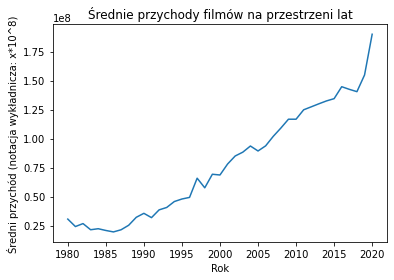

In [17]:
# średnie przychody filmów na przestrzeni lat

print(dane[['year', 'gross']].groupby(['year']).mean())
plt.plot(dane[['year', 'gross']].groupby(['year']).mean())
plt.title('Średnie przychody filmów na przestrzeni lat')
plt.ylabel("Średni przychód (notacja wykładnicza: x*10^8)")
plt.xlabel("Rok")
plt.show()

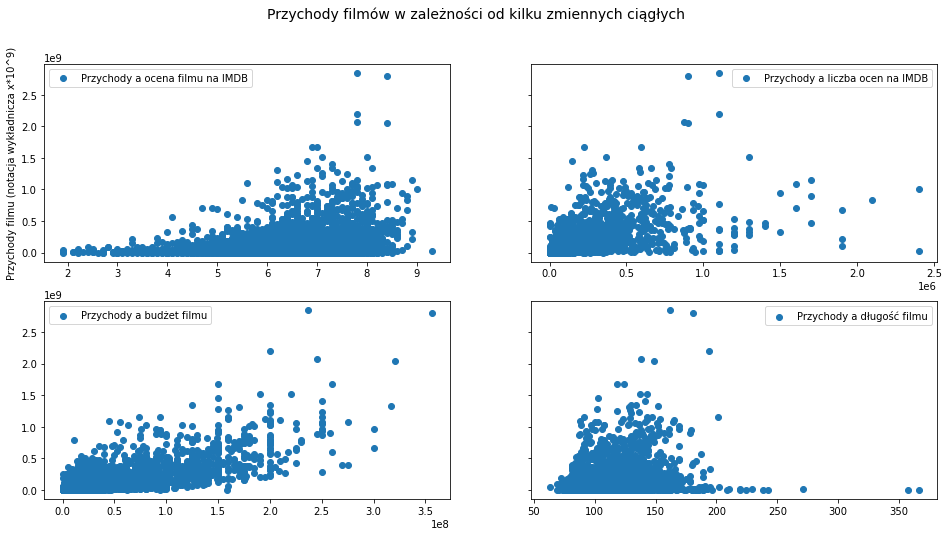

In [18]:
# przychody a ocena filmu na IMDB i liczba głosów

fig, ax = plt.subplots(2, 2, figsize=(16,8), sharey=True)

fig.suptitle('Przychody filmów w zależności od kilku zmiennych ciągłych', fontsize=14)

ax[0,0].scatter(dane["score"], dane["gross"], label = "Przychody a ocena filmu na IMDB")
ax[0,0].set_ylabel("Przychody filmu (notacja wykładnicza x*10^9)")
ax[0,0].legend()

ax[0,1].scatter(dane["votes"], dane["gross"], label = "Przychody a liczba ocen na IMDB")
ax[0,1].legend()

ax[1,0].scatter(dane["budget"], dane["gross"], label = "Przychody a budżet filmu")
ax[1,0].legend()

ax[1,1].scatter(dane["runtime"], dane["gross"], label = "Przychody a długość filmu")
ax[1,1].legend()

# Regresja liniowa

In [19]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
from string import ascii_letters

<AxesSubplot:>

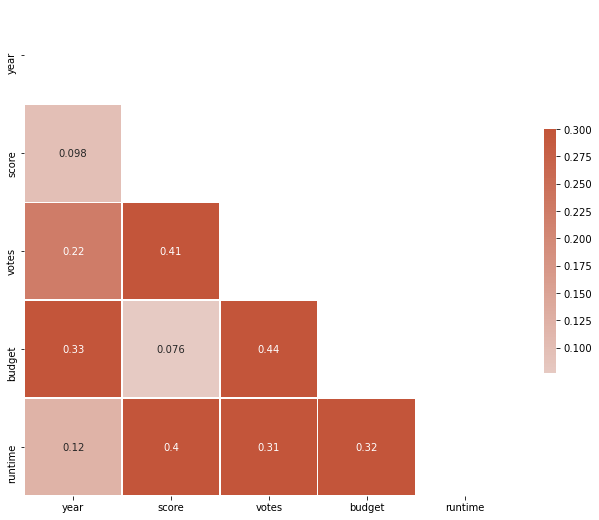

In [20]:
# korelacja między zmiennymi objaśniającymi

corr = dane[['year', 'score', 'votes', 'budget', 'runtime']].corr()

# 'maska'

mask = np.triu(np.ones_like(corr, dtype=bool))

# heatmapa

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

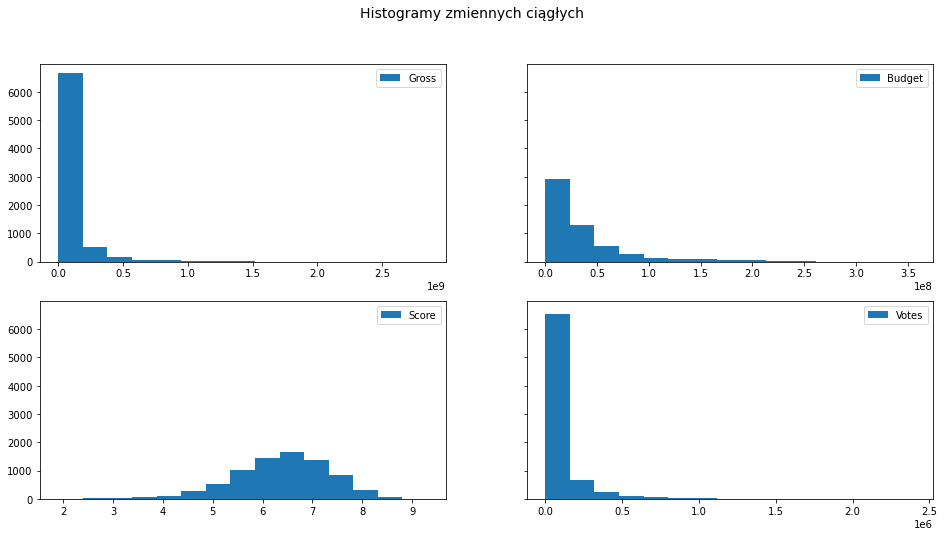

In [21]:
#histogramy (być może warto zlogarytmować niektóre zmienne)

fig, ax = plt.subplots(2, 2, figsize=(16,8), sharey=True)

fig.suptitle('Histogramy zmiennych ciągłych', fontsize=14)

ax[0,0].hist(dane["gross"], label = "Gross", bins = 15)
ax[0,0].legend()

ax[0,1].hist(dane["budget"], label = "Budget", bins = 15)
ax[0,1].legend()

ax[1,0].hist(dane["score"], label = "Score", bins = 15)
ax[1,0].legend()

ax[1,1].hist(dane["votes"], label = "Votes", bins = 15)
ax[1,1].legend()

In [22]:
formula = 'np.log(gross) ~ year + score + np.log(votes) + np.log(budget) + runtime + C(rating) + C(genre)'
result = smf.ols(formula, data=dane, missing='drop').fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(gross)   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     476.5
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:41:37   Log-Likelihood:                -8055.6
No. Observations:                5423   AIC:                         1.616e+04
Df Residuals:                    5398   BIC:                         1.633e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                17.8922      3.251      5.504      0.000      11.519      24.265
C(rating)[T.NC-17]       -1.3572      0.303     -4.483      0.000      -1.951      -0.764
C(rating)[T.PG]          -0.0971      0.116     -0.836      0.403      -0.325       0.131
C(rating)[T.PG-13]       -0.3535      0.123     -2.883      0.004      -0.594      -0.113
C(rating)[T.R]           -0.7488      0.122     -6.139      0.000      -0.988      -0.510
C(rating)[T.Unrated]     -1.6919      0.186     -9.082      0.000      -2.057      -1.327
C(genre)[T.Adventure]    -0.1330      0.069     -1.926      0.054      -0.268       0.002
C(genre)[T.Animation]     0.3928      0.090      4.355      0.000       0.216       0.570
C(genre)[T.Biography]    -0.1528      0.071     -2.144      0.032      -0.293      -0.013
C(genre)[T.Comedy]        0.0462      0.042      1.097      0.273      -0.036       0.129
C(genre)[T.Crime]        -0.1880      0.063     -2.966      0.003      -0.312      -0.064
C(genre)[T.Drama]        -0.1303      0.050     -2.616      0.009      -0.228      -0.033
C(genre)[T.Family]        0.3257      0.539      0.605      0.545      -0.730       1.382
C(genre)[T.Fantasy]      -0.0722      0.171     -0.423      0.672      -0.407       0.262
C(genre)[T.History]    3.366e-13    2.1e-13      1.601      0.110   -7.56e-14    7.49e-13
C(genre)[T.Horror]        0.3507      0.077      4.542      0.000       0.199       0.502
C(genre)[T.Music]      2.452e-13   1.53e-13      1.598      0.110   -5.55e-14    5.46e-13
C(genre)[T.Musical]    -2.25e-13   1.41e-13     -1.599      0.110   -5.01e-13    5.08e-14
C(genre)[T.Mystery]      -0.3540      0.262     -1.353      0.176      -0.867       0.159
C(genre)[T.Romance]      -1.1770      0.481     -2.447      0.014      -2.120      -0.234
C(genre)[T.Sci-Fi]        0.0191      0.439      0.043      0.965      -0.841       0.879
C(genre)[T.Sport]     -2.795e-15   1.74e-15     -1.608      0.108    -6.2e-15    6.13e-16
C(genre)[T.Thriller]      0.6915      0.406      1.701      0.089      -0.105       1.488
C(genre)[T.Western]       0.6590      0.759      0.868      0.385      -0.829       2.147
year                     -0.0081      0.002     -4.899      0.000      -0.011      -0.005
score                    -0.1585      0.022     -7.298      0.000      -0.201      -0.116
np.log(votes)             0.7731      0.015     50.333      0.000       0.743       0.803
np.log(budget)            0.4984      0.016     30.252      0.000       0.466       0.531
runtime                   0.0034      0.001      3.225      0.001       0.001       0.006
==============================================================================
Omnibus:                     1602.193   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarqu

In [23]:
print(result.summary()) #rating - "G" bazowe; genre - "action" bazowe

                            OLS Regression Results                            
Dep. Variable:          np.log(gross)   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     476.5
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:41:38   Log-Likelihood:                -8055.6
No. Observations:                5423   AIC:                         1.616e+04
Df Residuals:                    5398   BIC:                         1.633e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                17.89